### Business Understanding

**Business Objective**

ConnectTel, a leading telecommunications company, is facing significant customer churn, which threatens its long-term growth and profitability. The company provides a wide range of services, including mobile networks, broadband connections, and enterprise solutions. Despite its strong market presence, ConnectTel is losing valuable customers to competitors, largely due to ineffective customer retention strategies.

To address this, ConnectTel seeks to develop a Customer Churn Prediction System that can accurately identify which customers are likely to discontinue their services. By leveraging advanced machine learning techniques, the company aims to proactively retain customers, reducing churn rates, improving customer loyalty, and ensuring sustained business growth.

**Project Goal**

The goal of this project is to build a predictive model that can forecast customer churn based on historical data. This model will help ConnectTel identify at-risk customers before they leave.
Enable targeted retention efforts to reduce customer loss.

Optimize marketing and customer service resources by focusing on customers with the highest risk of churn.
Increase overall customer satisfaction by addressing factors that contribute to churn.

**Business Benefits**

By implementing this predictive model, ConnectTel expects to:

1. Reduce churn rates: Lowering customer attrition will have a direct impact on revenue by retaining high-value customers.
2. Improve customer retention strategies: The model will provide insights into the key factors that drive churn, enabling the company to tailor their strategies.
3. Increase profitability: Retaining existing customers is often more cost-effective than acquiring new ones, and the model will help ConnectTel allocate resources efficiently.

### Data Understanding

**Dataset Overview**

The dataset contains information about ConnectTel’s customers, including demographic data, service usage, billing information, and whether or not they have churned. The key features in the dataset include:

**CustomerID:** A unique identifier for each customer.
Demographic Information: Gender, age-related factors (SeniorCitizen), and family-related variables (Partner, Dependents).

**Service Subscription:** Types of services the customer has subscribed to, such as PhoneService, MultipleLines, InternetService (DSL, Fiber optic), OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies.

**Contract Information:** Tenure (duration of service), Contract type (month-to-month, one-year, two-year), PaperlessBilling, and PaymentMethod.

**Billing Information:** MonthlyCharges (current monthly amount) and TotalCharges (cumulative charges over the tenure).

**Target Variable (Churn):** Whether or not the customer has churned (1 = churned, 0 = not churned).

#### Exploratory Data Analysis (EDA)

In [138]:
pip install phik


   ---------------------------------------- 0.0/667.1 kB ? eta -:--:--
   - -------------------------------------- 30.7/667.1 kB 1.3 MB/s eta 0:00:01
   - -------------------------------------- 30.7/667.1 kB 1.3 MB/s eta 0:00:01
   ---- ---------------------------------- 71.7/667.1 kB 563.7 kB/s eta 0:00:02
   ------ ------------------------------- 122.9/667.1 kB 722.1 kB/s eta 0:00:01
   -------- ----------------------------- 143.4/667.1 kB 708.1 kB/s eta 0:00:01
   ---------- --------------------------- 184.3/667.1 kB 743.9 kB/s eta 0:00:01
   ----------- -------------------------- 204.8/667.1 kB 692.4 kB/s eta 0:00:01
   ------------- ------------------------ 235.5/667.1 kB 686.8 kB/s eta 0:00:01
   ---------------- --------------------- 286.7/667.1 kB 770.1 kB/s eta 0:00:01
   ---------------------- --------------- 389.1/667.1 kB 897.8 kB/s eta 0:00:01
   ------------------------- ------------ 450.6/667.1 kB 938.8 kB/s eta 0:00:01
   --------------------------- ---------- 481.3/66

In [156]:
# Import all libraries
import pandas as pd
import numpy as numpy

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

import phik
from phik import resources
from phik.report import plot_correlation_matrix

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [36]:
# Load data
data = pd.read_csv('Customer-Churn.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


- Most columns are of type object, even columns like TotalCharges, which should be numeric. We will need to convert this column from an object to a numerical type.

In [37]:
# Checking the structure of the dataset
data.shape

(7043, 21)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [39]:
# Identifying missing values
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

- The dataset contains 7,043 entries with 21 columns, including demographic, service, billing, and churn information.
- No missing values are present in any of the columns, which is a good sign for data quality except TotalCharges.

In [40]:
# Convert 'TotalCharges' to numeric
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [41]:
# Check for NaN values after conversion
print(data['TotalCharges'].isnull().sum()) 

11


In [42]:
# Identifying missing values
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Univariate Analysis

**Numerical Variables**

c:\Users\REGIA CRABBE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\REGIA CRABBE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\REGIA CRABBE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


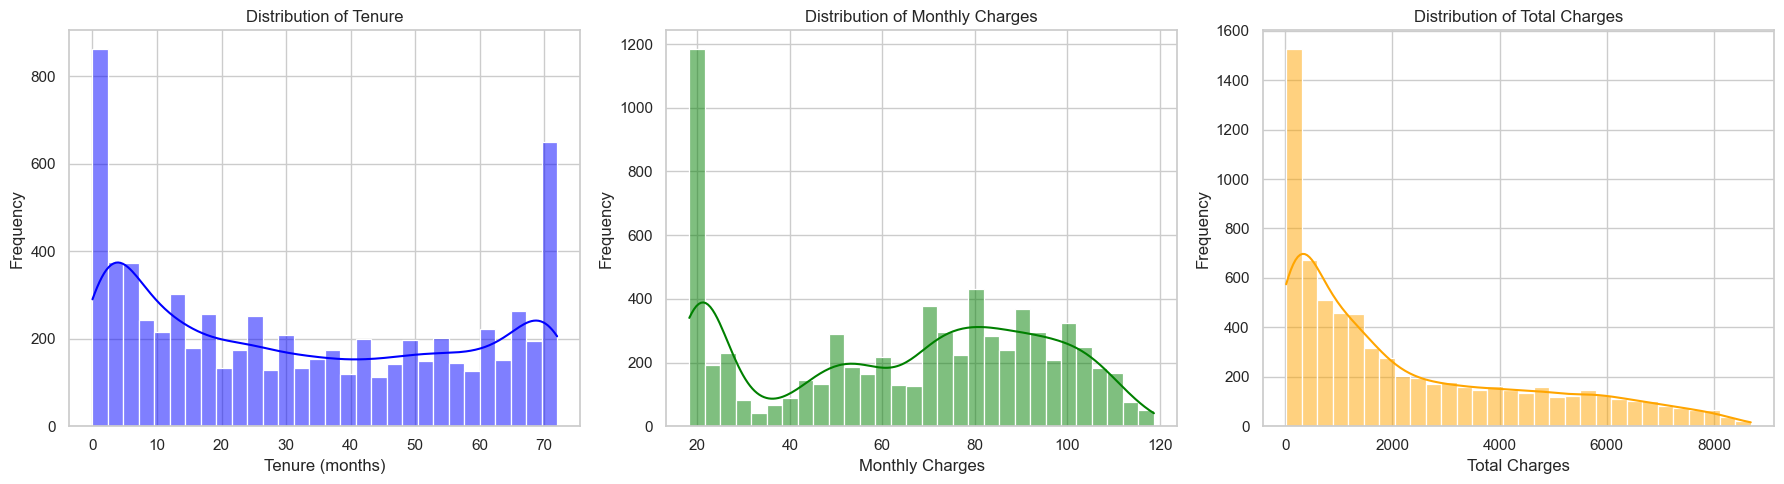

In [43]:
# Convert 'TotalCharges' to numeric, coercing errors to handle NaNs
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Set the style of seaborn
sns.set(style='whitegrid')

# Plotting histograms for numerical features
plt.figure(figsize=(18, 5))

# Distribution of Tenure
plt.subplot(1, 3, 1)
sns.histplot(data['tenure'], bins=30, color='blue', kde=True)
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Frequency')

# Distribution of Monthly Charges
plt.subplot(1, 3, 2)
sns.histplot(data['MonthlyCharges'], bins=30, color='green', kde=True)
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')

# Distribution of Total Charges
plt.subplot(1, 3, 3)
sns.histplot(data['TotalCharges'], bins=30, color='orange', kde=True)
plt.title('Distribution of Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


- Tenure: There seems to be a high frequency of customers with short tenure (0 to 10 months).
As tenure increases, the frequency decreases, indicating that most customers have not been with the service for a long time.
- Monthly Charges: The distribution appears to be right-skewed, with many customers having monthly charges in the lower range.
There are fewer customers with higher monthly charges, suggesting that most customers prefer lower-cost plans.
- Total Charges: This also appears to be right-skewed, with many customers having lower total charges.
The steep drop-off in frequency at higher charges indicates that very few customers have high total charges.

In [44]:
# Summary Statistics
print(data[['tenure', 'MonthlyCharges', 'TotalCharges']].describe())

            tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7032.000000
mean     32.371149       64.761692   2283.300441
std      24.559481       30.090047   2266.771362
min       0.000000       18.250000     18.800000
25%       9.000000       35.500000    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.850000   3794.737500
max      72.000000      118.750000   8684.800000


- Tenure: The average customer has been with the service for over 2.5 years, but a significant portion has a short tenure (many are less than 1 year).
- Monthly Charges: There's a notable range of monthly charges. Most customers appear to pay below the average, but the presence of high charges could suggest premium services or upselling.
- Total Charges: The substantial standard deviation in total charges indicates diverse customer spending habits, with some customers being significantly more valuable than others.

In [45]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [46]:
print(data['Churn'].unique())



['No' 'Yes']


**Categorical Variables**

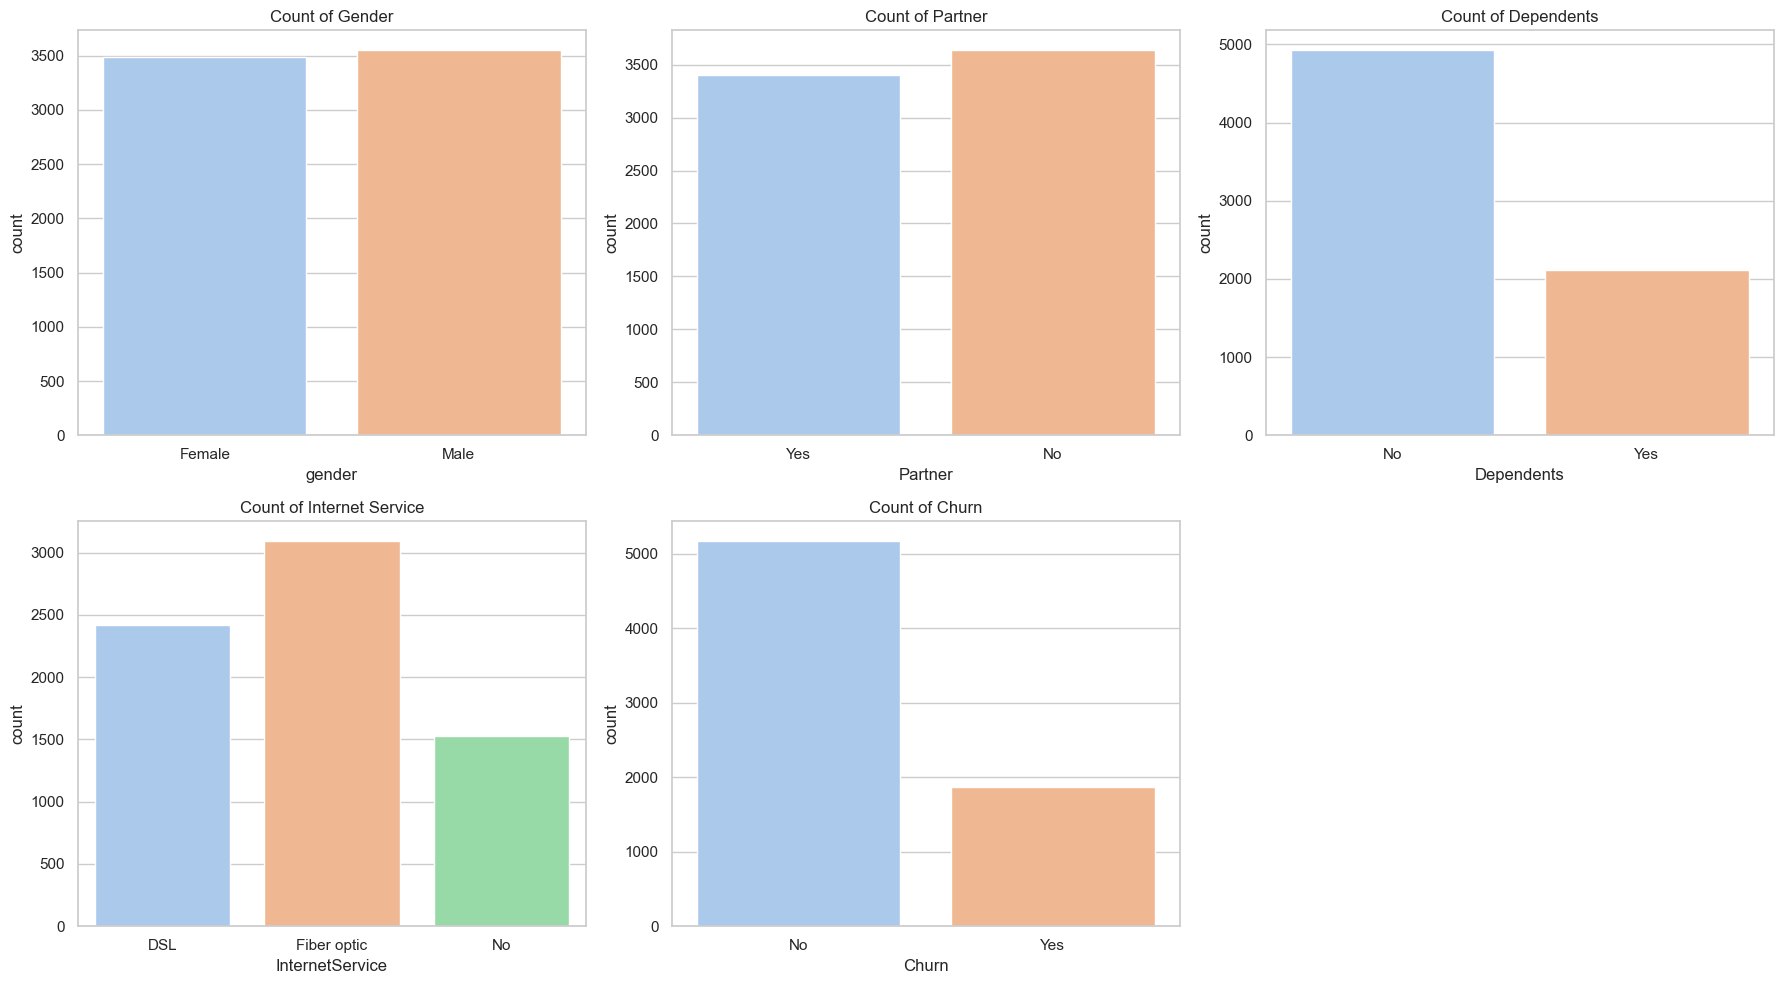

In [48]:
# Plotting count plots for categorical features
plt.figure(figsize=(18, 10))

# Count of Gender
plt.subplot(2, 3, 1)
sns.countplot(x='gender', data=data, palette='pastel')
plt.title('Count of Gender')

# Count of Partner
plt.subplot(2, 3, 2)
sns.countplot(x='Partner', data=data, palette='pastel')
plt.title('Count of Partner')

# Count of Dependents
plt.subplot(2, 3, 3)
sns.countplot(x='Dependents', data=data, palette='pastel')
plt.title('Count of Dependents')

# Count of Internet Service
plt.subplot(2, 3, 4)
sns.countplot(x='InternetService', data=data, palette='pastel')
plt.title('Count of Internet Service')

# Count of Churn
plt.subplot(2, 3, 5)
sns.countplot(x='Churn', data=data, palette='pastel')
plt.title('Count of Churn')

plt.tight_layout()
plt.show()


- **Count of Gender:** The number of female and male customers is nearly equal, showing no significant gender bias in the customer base.
- **Count of Partner:** Slightly more customers do not have partners compared to those who do.
- **Count of Dependents:** The majority of customers do not have dependents, indicating that customers without dependents form a larger portion of the dataset.
- **Count of Internet Service:** Fiber optic internet service is the most common, followed by DSL. A smaller portion of customers do not have any internet service.
- **Count of Churn:** Most customers have not churned, but there is a noticeable number of customers who have churned.

The imbalance in the churn variable can be seen in the count plot (bottom right chart). From the graph, it is clear that:

The majority of the data points are labeled as "No Churn" (customers who did not churn).
A smaller portion of the data points are labeled as "Churn" (customers who churned).
This imbalance can affect model performance, particularly in favoring the majority class ("No Churn"), which is why applying techniques like class weighting or oversampling/undersampling of the minority class can be important when building a predictive model for churn.

#### Bivariate Analysis

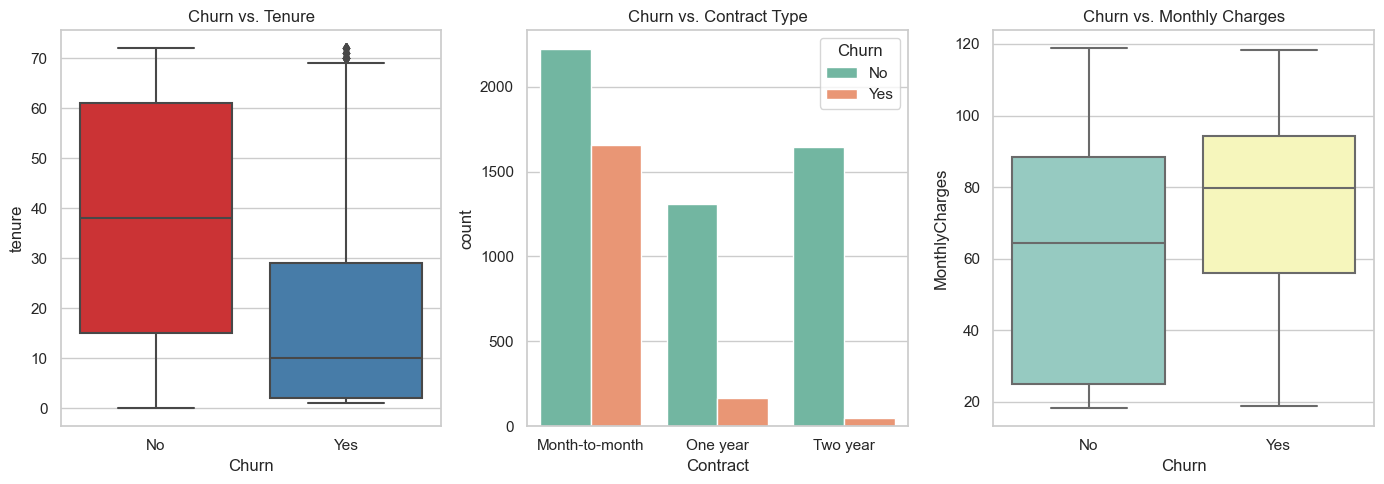

In [15]:
# Setting the style for the plots
sns.set(style="whitegrid")

# Churn vs. Tenure
plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='Churn', y='tenure', data=data, palette="Set1")
plt.title('Churn vs. Tenure')

# Churn vs. Contract Type
plt.subplot(1, 3, 2)
sns.countplot(x='Contract', hue='Churn', data=data, palette="Set2")
plt.title('Churn vs. Contract Type')

# Churn vs. Monthly Charges
plt.subplot(1, 3, 3)
sns.boxplot(x='Churn', y='MonthlyCharges', data=data, palette="Set3")
plt.title('Churn vs. Monthly Charges')

plt.tight_layout()
plt.show()


- Churn vs. Tenure: Customers with shorter tenures are more likely to churn. The median tenure for churned customers is considerably lower (approximately 10-20 months). For customers who haven't churned, the tenure is higher (median around 50 months), indicating that long-term customers are less likely to leave.
- Churn vs. Contract Type: Month-to-month contracts have the highest churn rates. The majority of customers on this plan churn. In contrast, customers on one-year and two-year contracts are less likely to churn, with very few of them churning, likely due to the commitment they have to the service.
- Churn vs. Monthly Charges: Customers who churn tend to have higher monthly charges compared to those who stay, although there is overlap. The median monthly charge is noticeably higher for churned customers, suggesting that cost might be a factor in churn decisions.

**Insights:** Short-term customers and those on month-to-month contracts are more prone to churn. Targeting these segments with loyalty programs or more affordable long-term plans could reduce churn. Higher monthly charges seem to correlate with churn. A pricing strategy or offering discounts to high-paying customers may help retain them.

Churn by Gender:
Churn         No       Yes
gender                    
Female  0.730791  0.269209
Male    0.738397  0.261603
All     0.734630  0.265370

Churn by Partner:
Churn          No       Yes
Partner                    
No       0.670420  0.329580
Yes      0.803351  0.196649
All      0.734630  0.265370

Churn by Dependents:
Churn             No       Yes
Dependents                    
No          0.687209  0.312791
Yes         0.845498  0.154502
All         0.734630  0.265370

Churn by Internet Service:
Churn                  No       Yes
InternetService                    
DSL              0.810409  0.189591
Fiber optic      0.581072  0.418928
No               0.925950  0.074050
All              0.734630  0.265370


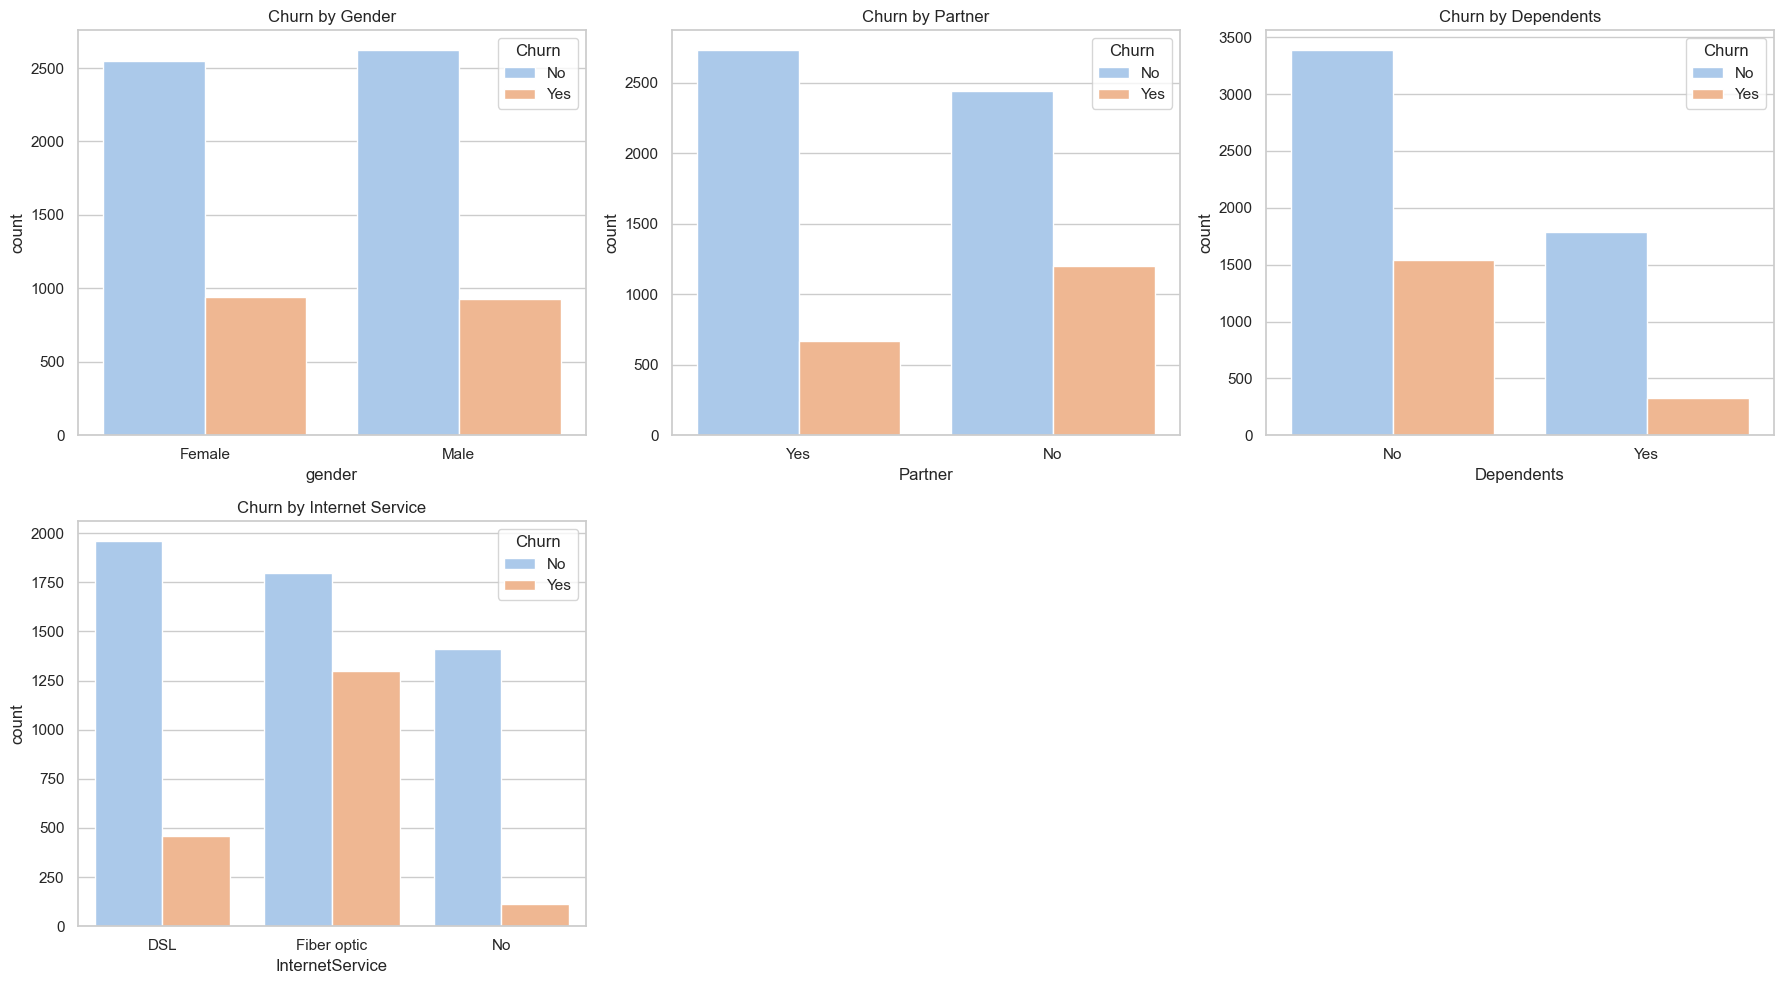

In [49]:
# Cross-tabulation between Churn and other categorical variables
print("Churn by Gender:")
print(pd.crosstab(data['gender'], data['Churn'], margins=True, normalize='index'))

print("\nChurn by Partner:")
print(pd.crosstab(data['Partner'], data['Churn'], margins=True, normalize='index'))

print("\nChurn by Dependents:")
print(pd.crosstab(data['Dependents'], data['Churn'], margins=True, normalize='index'))

print("\nChurn by Internet Service:")
print(pd.crosstab(data['InternetService'], data['Churn'], margins=True, normalize='index'))

# Plotting the bivariate analysis (Churn vs other variables)
plt.figure(figsize=(18, 10))

# Churn by Gender
plt.subplot(2, 3, 1)
sns.countplot(x='gender', hue='Churn', data=data, palette='pastel')
plt.title('Churn by Gender')

# Churn by Partner
plt.subplot(2, 3, 2)
sns.countplot(x='Partner', hue='Churn', data=data, palette='pastel')
plt.title('Churn by Partner')

# Churn by Dependents
plt.subplot(2, 3, 3)
sns.countplot(x='Dependents', hue='Churn', data=data, palette='pastel')
plt.title('Churn by Dependents')

# Churn by Internet Service
plt.subplot(2, 3, 4)
sns.countplot(x='InternetService', hue='Churn', data=data, palette='pastel')
plt.title('Churn by Internet Service')

plt.tight_layout()
plt.show()


1. Churn by Gender:
Both male and female customers have similar churn patterns, with no significant difference.
The count of customers who churned (in orange) is roughly equal for both genders.
2. Churn by Partner:
Customers without a partner tend to churn more compared to those with a partner.
The difference is quite noticeable: more customers with a partner (in blue) are not churning, while more customers without a partner tend to churn.
3. Churn by Dependents:
Customers without dependents are much more likely to churn compared to those with dependents.
A significant number of customers with dependents tend not to churn, as seen from the larger blue bar for "No Churn" in customers with dependents.
4. Churn by Internet Service:
Customers using fiber optic internet service churn significantly more than those using DSL or no internet service at all. The churn rate is notably higher for fiber optic users, suggesting this service might be causing dissatisfaction or issues that lead to churn.

**Insights:**

- Partner and Dependents status seem to play a role in churn, with customers without partners or dependents churning more often.
- Internet Service type is a critical factor, with fiber optic users experiencing a higher churn rate compared to DSL users.

In [50]:
data.to_csv('data.csv', index=False)

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


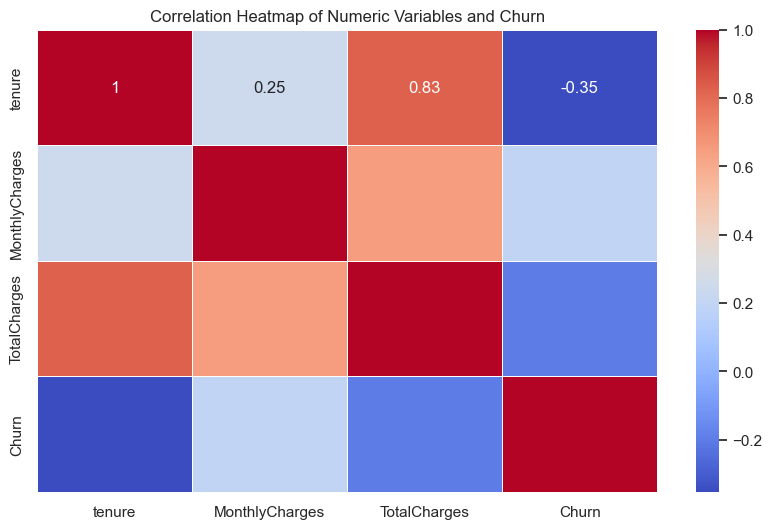

In [74]:
# Selecting numeric columns for correlation excluding SeniorCitizen
numeric_columns = ['tenure', 'MonthlyCharges', 'TotalCharges','Churn']

# Compute the correlation matrix
correlation_matrix = data[numeric_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Variables and Churn')
plt.show()



Key Observations:
- Tenure and Churn:

Correlation: -0.35: This indicates a moderate negative correlation, meaning that as tenure increases, the likelihood of churn decreases. Customers with longer tenure tend to stay with the company.

- MonthlyCharges and Churn:

Correlation: 0.19 (approximately): This suggests a weak positive correlation. Higher monthly charges slightly increase the likelihood of churn, but the relationship is not very strong.
- TotalCharges and Churn:

Correlation: -0.20 (approximately): There is a weak negative correlation between TotalCharges and churn, implying that customers who have accumulated higher total charges are less likely to churn.
- Tenure and TotalCharges:

Correlation: 0.83: This strong positive correlation is expected because the longer a customer has been with the company (tenure), the higher their total charges, as they've been paying for a longer period of time.
MonthlyCharges and TotalCharges:

Moderate Positive Correlation (around 0.6): Customers with higher monthly charges tend to have higher total charges, which makes sense since total charges are an accumulation of monthly charges over time.

**Insights from the Heatmap:**
- Tenure is a significant predictor of churn, with longer-tenured customers being less likely to churn.
- MonthlyCharges have a weak positive relationship with churn, meaning customers with higher monthly charges are somewhat more likely to leave, but the effect is smaller.
- TotalCharges and churn have a weak negative correlation, suggesting that long-time customers with high cumulative charges are less likely to churn.

### Multivariate Analysis

**Relationships between tenure, MonthlyCharges, TotalCharges, and Churn.**

c:\Users\REGIA CRABBE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\REGIA CRABBE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\REGIA CRABBE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


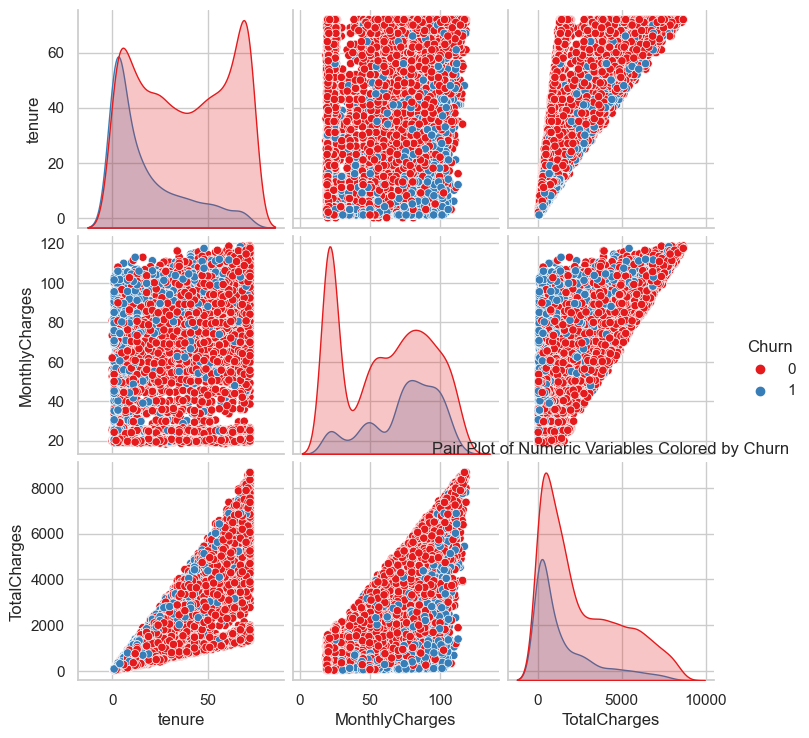

In [75]:
# Pair plot of numeric variables colored by Churn
sns.pairplot(data, vars=['tenure', 'MonthlyCharges', 'TotalCharges'], hue='Churn', palette='Set1')
plt.title('Pair Plot of Numeric Variables Colored by Churn')
plt.show()


**Key Observations:** 

1. Tenure vs. Churn:
- Tenure: Customers who churn (blue points) tend to have shorter tenures compared to those who stay (red points). The density plot also shows that most churned customers are clustered at the lower end of the tenure range.
2. MonthlyCharges vs. Churn:
- MonthlyCharges: Customers who churn (blue) are more prevalent at the higher end of monthly charges. This suggests that higher monthly charges could be a driver of churn, though the relationship is somewhat scattered.
3. TotalCharges vs. Churn:
- TotalCharges: Churned customers (blue) are more concentrated at lower total charges. This is consistent with the correlation seen earlier, where TotalCharges has a weak negative relationship with churn, meaning that customers who have accumulated higher total charges over time are less likely to churn.
4. Relationships Between Variables:
- Tenure and TotalCharges: As expected, there is a strong linear relationship between tenure and total charges, as longer-tenured customers have paid more over time.
- MonthlyCharges and TotalCharges: There’s some variation in the relationship between monthly charges and total charges, likely due to the different lengths of customer tenure.

**Key Insights:**

- Tenure is a strong indicator of churn: Customers with shorter tenures are more likely to churn.
- MonthlyCharges: Higher monthly charges might slightly increase the risk of churn, but the effect is less clear.
- TotalCharges: Higher total charges are linked to lower churn, as customers who have stayed longer and paid more over time tend to remain loyal.

In [56]:
# Grouping by Partner and Churn to see the mean of Monthly Charges
mean_charges = data.groupby(['Partner', 'Churn'])['MonthlyCharges'].mean().unstack()
print(mean_charges)

# Grouping by Internet Service and Churn to see the mean of Total Charges
mean_total_charges = data.groupby(['InternetService', 'Churn'])['TotalCharges'].mean().unstack()
print(mean_total_charges)


Churn            0          1
Partner                      
No       57.271856  71.450958
Yes      64.831742  79.805232
Churn                      0            1
InternetService                          
DSL              2433.006822   784.349673
Fiber optic      4135.834074  1914.616384
No                704.678003   173.919912


**Mean Monthly Charges by Partner and Churn.**

<Figure size 1000x600 with 0 Axes>

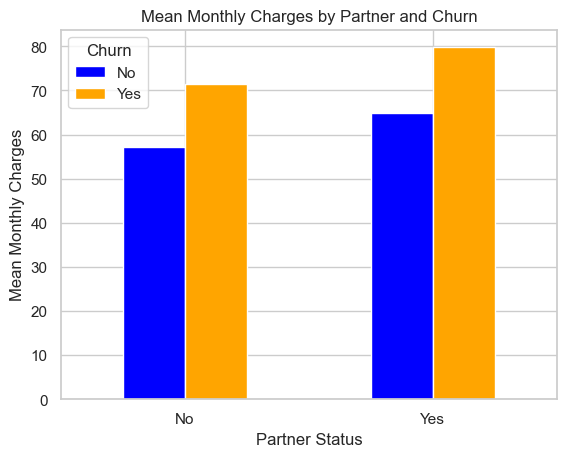

In [59]:
# Grouping by Partner and Churn to see the mean of Monthly Charges
mean_charges = data.groupby(['Partner', 'Churn'])['MonthlyCharges'].mean().unstack()

# Plotting mean Monthly Charges by Partner and Churn
plt.figure(figsize=(10, 6))
mean_charges.plot(kind='bar', color=['blue', 'orange'])
plt.title('Mean Monthly Charges by Partner and Churn')
plt.xlabel('Partner Status')
plt.ylabel('Mean Monthly Charges')
plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

**Mean Total Charges by Internet Service and Churn.**

<Figure size 1000x600 with 0 Axes>

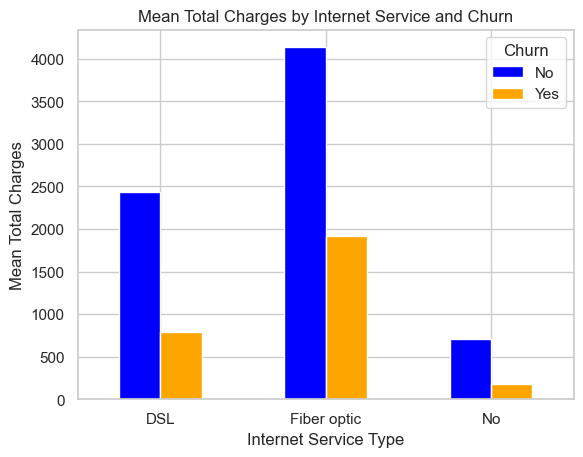

In [60]:
# Grouping by Internet Service and Churn to see the mean of Total Charges
mean_total_charges = data.groupby(['InternetService', 'Churn'])['TotalCharges'].mean().unstack()

# Plotting mean Total Charges by Internet Service and Churn
plt.figure(figsize=(10, 6))
mean_total_charges.plot(kind='bar', color=['blue', 'orange'])
plt.title('Mean Total Charges by Internet Service and Churn')
plt.xlabel('Internet Service Type')
plt.ylabel('Mean Total Charges')
plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

**How do the variables tenure, MonthlyCharges, and TotalCharges impact the likelihood of a customer churning?**

In [70]:
# Define the independent variables and target
X = data_cleaned[['tenure', 'MonthlyCharges', 'TotalCharges']]
y = data_cleaned['Churn']

# Add a constant (intercept) to the model
X = sm.add_constant(X)

# Fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print the summary of the regression
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.453701
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7043
Model:                          Logit   Df Residuals:                     7039
Method:                           MLE   Df Model:                            3
Date:                Thu, 17 Oct 2024   Pseudo R-squ.:                  0.2159
Time:                        05:23:18   Log-Likelihood:                -3195.4
converged:                       True   LL-Null:                       -4075.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.6551      0.116    -14.259      0.000      -1.883      -1.428
tenure           

- Pseudo R-squared (0.2159): This indicates that approximately 21.59% of the variation in Churn is explained by the variables tenure, MonthlyCharges, and TotalCharges. While this isn't a perfect fit, it's common in social science and customer behavior data for Pseudo R-squared to be lower than in more deterministic fields.
- Log-Likelihood (-3195.4): The log-likelihood measures how well the model fits the data. A less negative value suggests a better fit.
- LLR p-value (0.000): This indicates that the overall model is statistically significant, meaning the predictors collectively have a statistically significant relationship with churn.
Coefficients Interpretation:
- Intercept (const) (-1.6551): This is the intercept of the model, the baseline log-odds of churn when all predictors are set to 0. It's not very interpretable in isolation, but it provides a baseline for the logistic regression equation.
- Tenure:
Coefficient (-0.0641): This means that for every additional month of tenure, the log-odds of churn decrease by 0.0641, indicating that customers with longer tenure are less likely to churn.
p-value: 0.000: Since this p-value is highly significant (less than 0.05), we can confidently say that tenure has a strong and significant impact on churn.
- MonthlyCharges:
Coefficient (0.0309): For every additional dollar in monthly charges, the log-odds of churn increase by 0.0309. This indicates that customers with higher monthly charges are more likely to churn.
p-value: 0.000: This is also highly significant, indicating that MonthlyCharges has a significant effect on churn.
- TotalCharges:
Coefficient (0.0001): The log-odds of churn increase very slightly for each additional unit of total charges, but the effect size is quite small.
p-value: 0.062: The p-value is marginally significant, meaning we are less confident that TotalCharges has a strong independent effect on churn compared to the other two variables.

**Key Insights:**

- Tenure: Longer tenure significantly reduces the likelihood of churn. This makes sense as long-term customers are generally more loyal.
- MonthlyCharges: Higher monthly charges increase the likelihood of churn. This suggests that pricing might be a key driver of customer churn, particularly for customers who find the charges too high.
- TotalCharges: The effect of total charges is minimal and only marginally significant, implying that it might not be as important a predictor of churn compared to the other variables.

### Data Preparation

**Handling Missing Values**

In [131]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [132]:
# Fill missing values in 'TotalCharges' with the median
data_copy = data.copy()
data_copy['TotalCharges'].fillna(data_copy['TotalCharges'].median(), inplace=True)

# Check to confirm there are no missing values now
print(data_copy.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [133]:
# Check for NaN values in each column
print(data_copy.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [134]:
data_copy.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [118]:
data_copy.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,0.0,...,0.0,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,1.0,...,1.0,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,1.0,...,0.0,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,1.0,...,1.0,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,0.0,...,0.0,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
5,9305-CDSKC,0,0,0,0,8,1,Yes,Fiber optic,0.0,...,1.0,No,Yes,Yes,Month-to-month,1,Electronic check,99.65,820.50,1
6,1452-KIOVK,1,0,0,1,22,1,Yes,Fiber optic,0.0,...,0.0,No,Yes,No,Month-to-month,1,Credit card (automatic),89.10,1949.40,0
7,6713-OKOMC,0,0,0,0,10,0,No phone service,DSL,1.0,...,0.0,No,No,No,Month-to-month,0,Mailed check,29.75,301.90,0
8,7892-POOKP,0,0,1,0,28,1,Yes,Fiber optic,0.0,...,1.0,Yes,Yes,Yes,Month-to-month,1,Electronic check,104.80,3046.05,1
9,6388-TABGU,1,0,0,1,62,1,No,DSL,1.0,...,0.0,No,No,No,One year,0,Bank transfer (automatic),56.15,3487.95,0


In [135]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [120]:
data_copy.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#### Feature Selection

Churn               1.000000
tenure              0.474001
PaymentMethod       0.449125
MonthlyCharges      0.360038
PaperlessBilling    0.295754
TotalCharges        0.281437
Dependents          0.253936
Contract            0.251639
SeniorCitizen       0.233432
Partner             0.232930
OnlineSecurity      0.211840
TechSupport         0.209021
InternetService     0.196202
OnlineBackup        0.177422
DeviceProtection    0.170762
StreamingMovies     0.139522
StreamingTV         0.139246
MultipleLines       0.021922
PhoneService        0.000000
gender              0.000000
Name: Churn, dtype: float64


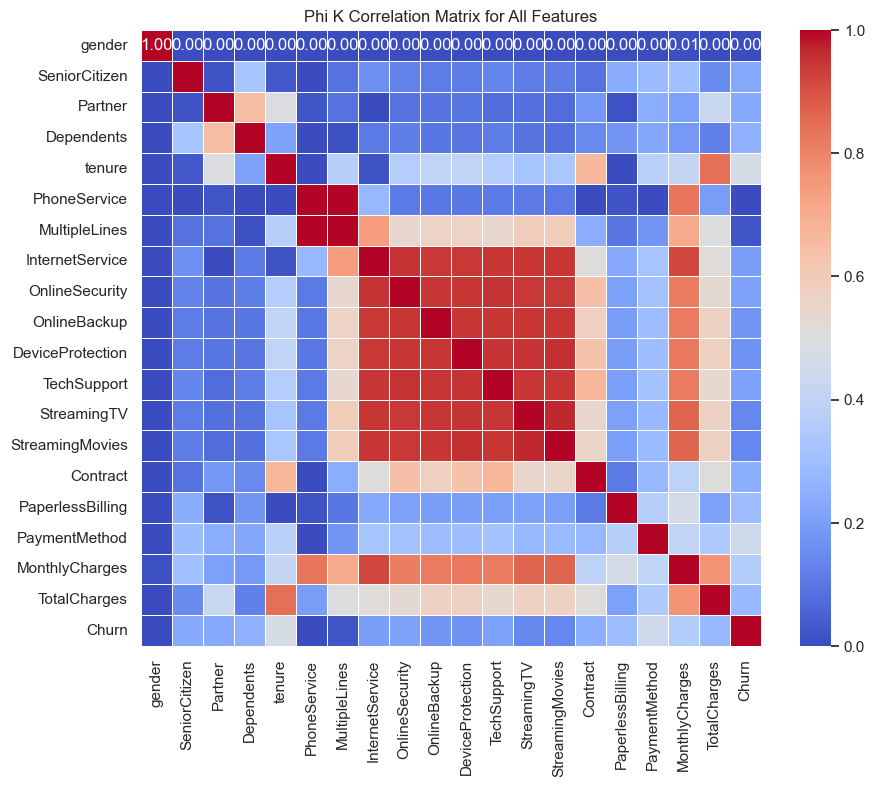

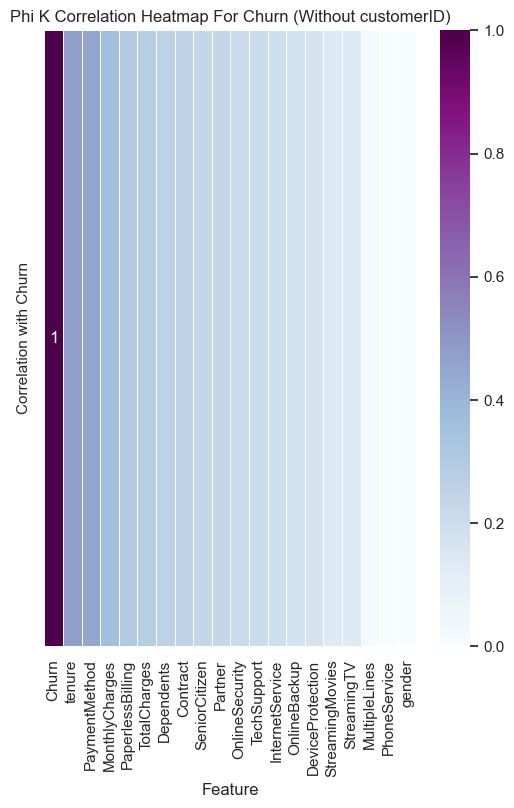

In [145]:
# 1. Prepare the data: Ensure there are no missing values
data_copy.fillna(0, inplace=True)  # Filling missing values with 0 for compatibility

# 2. Ensure that 'Churn' is of integer type
data_copy['Churn'] = data_copy['Churn'].astype(int)

# 3. Drop 'customerID' if it exists in the dataset (since it's not useful for correlation)
if 'customerID' in data_copy.columns:
    data_copy = data_copy.drop(columns=['customerID'])

# 4. Calculate the Phi K correlation matrix (specifying interval columns)
interval_columns = ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']
phik_matrix = data_copy.phik_matrix(interval_cols=interval_columns)

# 5. Display the correlation with 'Churn'
churn_correlation = phik_matrix['Churn'].sort_values(ascending=False)
print(churn_correlation)  # Sorted correlation with Churn

# 6. Optional: Visualize the full correlation matrix for all features
plt.figure(figsize=(10, 8))
sns.heatmap(phik_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Phi K Correlation Matrix for All Features')
plt.show()

# 7. Visualize the Phi K correlation specific to 'Churn' with other features
plt.figure(figsize=(6, 8))
churn_corr_df = churn_correlation.reset_index().rename(columns={'Churn': 'Correlation with Churn', 'index': 'Feature'})
sns.heatmap(churn_corr_df.set_index('Feature').T, annot=True, cmap="BuPu", linewidths=0.5)

# Add titles and labels
plt.title('Phi K Correlation Heatmap For Churn (Without customerID)')
plt.show()


**Drop Irrelevant Columns**

In [146]:
# Dropping 'gender' and 'PhoneService' from the dataset
data_copy = data_copy.drop(columns=['gender', 'PhoneService'], errors='ignore')

# Check if the columns were successfully dropped
print(data_copy.columns)


Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')


#### Encoding and Scaling

In [147]:
# 1. Separate numeric and categorical features (excluding Churn)
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']
categorical_features = ['Partner', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                        'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
                        'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

In [150]:
# 2. Define the transformations:
# One-Hot Encoding for categorical variables, Standard Scaling for numeric variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)  # drop='first' to avoid dummy variable trap
    ]
)

In [151]:
# 3. Create a pipeline that applies the transformations
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])


In [152]:
# 4. Separate the features and target variable (Churn)
X = data_copy.drop(columns=['Churn'])  # Features excluding 'Churn'
y = data_copy['Churn']  # Target variable

# 5. Fit the pipeline on the data (excluding 'Churn')
X_preprocessed = pipeline.fit_transform(X)

# Check the preprocessed data shape
print(X_preprocessed.shape)

(7043, 28)


#### Splitting the Data

In [153]:
from sklearn.model_selection import train_test_split

# Split the preprocessed data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Check the shape of the resulting splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5634, 28)
X_test shape: (1409, 28)
y_train shape: (5634,)
y_test shape: (1409,)


#### Training and Evaluating Models

In [167]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Define a dictionary of models, now including Decision Tree
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

# Dictionary to store model performance
model_performance = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model's accuracy
    accuracy = accuracy_score(y_test, y_pred)
    model_performance[model_name] = accuracy
    
    # Print the accuracy of each model
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    
    # Print classification report for each model
    print(f"\n{model_name} Classification Report:\n")
    print(classification_report(y_test, y_pred))

# Print the best model based on accuracy
best_model = max(model_performance, key=model_performance.get)
print(f"\nBest Model: {best_model} with Accuracy: {model_performance[best_model]:.4f}")


Logistic Regression Accuracy: 0.8211

Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409

Random Forest Accuracy: 0.8027

Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.67      0.51      0.58       373

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409

Gradient Boosting Accuracy: 0.8098

Gradient Boosting Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
       

**Insights:**

- Logistic Regression performed the best in terms of overall accuracy and produced relatively strong performance for Class 1 (Churn), with a decent balance between precision and recall.
- SVM and Gradient Boosting also performed fairly well, but Logistic Regression has the best F1-Score for the minority class (Churn).
- Random Forest struggled with recall for Class 1, meaning it missed many positive churn predictions.
- Decision Tree has the lowest performance, with an accuracy of 0.7033.

#### Hyperparameter Tuning with GridSearchCV

In [160]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Define the parameter grid for Logistic Regression
param_grid = {
    'model__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'model__penalty': ['l1', 'l2'],  # Regularization type
    'model__solver': ['liblinear'],  # Solver that supports both l1 and l2
}

# Create a pipeline (optional if you want to combine steps like scaling or encoding)
pipeline = Pipeline([
    ('model', LogisticRegression(max_iter=1000))
])

# Set up GridSearchCV with the pipeline and parameter grid
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_log_reg = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Logistic Regression Parameters: {best_params}")
print(f"Best Logistic Regression Accuracy: {best_score:.4f}")


Best Logistic Regression Parameters: {'model__C': 100, 'model__penalty': 'l2', 'model__solver': 'liblinear'}
Best Logistic Regression Accuracy: 0.8026


#### Confusion Matrix

Confusion Matrix helps to better understand the performance of the Logistic Regression model. The confusion matrix will show the true positives, true negatives, false positives, and false negatives.

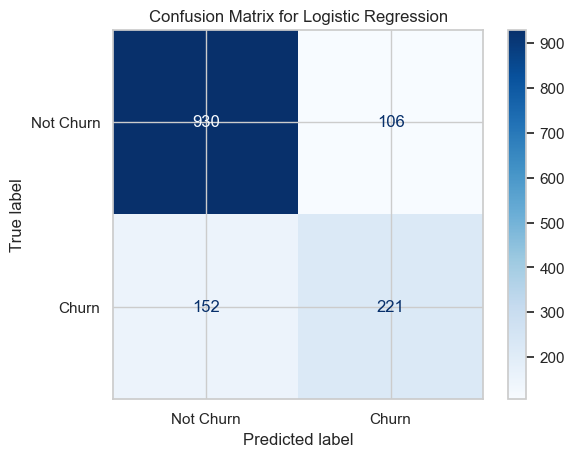

In [161]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Use the best Logistic Regression model to make predictions on the test set
y_pred = best_log_reg.predict(X_test)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Not Churn', 'Churn'])
disp.plot(cmap='Blues')

# Add a title
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


**Confusion Matrix Breakdown:**
- True Negatives (TN): 930
(Predicted "Not Churn" correctly, actual "Not Churn")

- False Positives (FP): 106
(Predicted "Churn", but actual was "Not Churn")

- False Negatives (FN): 152
(Predicted "Not Churn", but actual was "Churn")

- True Positives (TP): 221
(Predicted "Churn" correctly, actual "Churn")

**Interpretation:**

- The model correctly predicted 930 customers who did not churn (TN).
- It correctly predicted 221 customers who churned (TP).
- There were 106 false positives, meaning that the model incorrectly predicted churn for 106 customers who did not churn.
- There were 152 false negatives, meaning that the model failed to predict churn for 152 customers who actually churned.

### Handling Imbalance in the Target Variable (Churn)

Since I am working with models like Logistic Regression, SVM, Random Forest, Gradient Boosting, and Decision tree, adjusting the class weights is a good first step. This method is simple to implement and doesn't require creating synthetic data, which can introduce noise.

In [162]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Define a dictionary of models, including Decision Tree and class weighting for imbalance
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(class_weight='balanced'),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced')
}

# Dictionary to store model performance
model_performance = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model's accuracy
    accuracy = accuracy_score(y_test, y_pred)
    model_performance[model_name] = accuracy
    
    # Print the accuracy of each model
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    
    # Print classification report for each model
    print(f"\n{model_name} Classification Report:\n")
    print(classification_report(y_test, y_pred))

# Print the best model based on accuracy
best_model = max(model_performance, key=model_performance.get)
print(f"\nBest Model: {best_model} with Accuracy: {model_performance[best_model]:.4f}")


Logistic Regression Accuracy: 0.7495

Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1036
           1       0.52      0.83      0.64       373

    accuracy                           0.75      1409
   macro avg       0.72      0.77      0.72      1409
weighted avg       0.81      0.75      0.76      1409

Random Forest Accuracy: 0.7928

Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.47      0.55       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409

Gradient Boosting Accuracy: 0.8098

Gradient Boosting Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
       

**Performance Overview with Class Weights:**

- Logistic Regression:

Accuracy: 0.7495
Precision/Recall Tradeoff: Achieves high precision for Class 0 (Not Churn) and high recall for Class 1 (Churn). This means it correctly identifies more of the churn instances but sacrifices some precision for Class 1.
Best Recall for Class 1: It has the highest recall (0.83) for the minority class.

- Random Forest:

Accuracy: 0.7928
Better Balance for Class 0: High precision for Class 0, but struggles with recall for Class 1 (Churn), similar to the imbalanced case.
Best Accuracy for Class Weights: Second-best overall accuracy (after Gradient Boosting), but with weaker recall for Class 1.

- Gradient Boosting:

Accuracy: 0.8098
Best Balance: Shows a solid balance between precision, recall, and F1 for both classes. This indicates that Gradient Boosting, even with class weights, can handle class imbalance well.
Consistent High Performance: This model continues to provide robust performance for both Class 0 and Class 1 with a relatively good balance of precision and recall.

- SVM:

Accuracy: 0.7537
Similar tradeoff as Logistic Regression, but with slightly lower performance. SVM tends to give high precision for Class 0 and better recall for Class 1.
K-Nearest Neighbors:

Accuracy: 0.7693
Performs better on Class 0 (Not Churn) and is weaker on Class 1 with low precision and recall.

- Decision Tree:

Accuracy: 0.7459
Decision Tree performs modestly, but its recall and precision for Class 1 (Churn) are lower, making it less ideal compared to other models.

**Key Insights:**

- Gradient Boosting still emerges as the best model, even with class weights, achieving the highest accuracy (0.8098) and offering a well-balanced precision and recall for both classes.
- Logistic Regression with class weights provides strong recall for Class 1 (Churn), which could be crucial if your primary goal is to capture as many churn cases as possible. However, its overall accuracy is lower than Gradient Boosting.
- Random Forest is second-best in accuracy, but its recall for Class 1 remains weak, making it less favorable for handling churn prediction.

#### Confusion Matrix for Gradient Boost

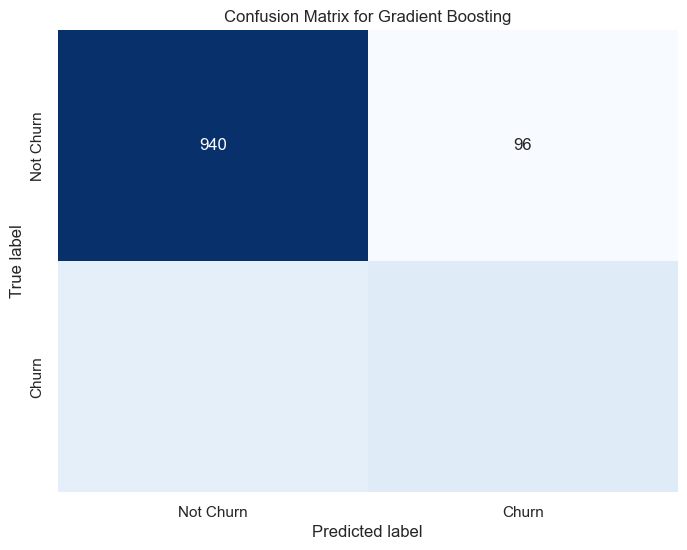

In [163]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict using the best model (Gradient Boosting)
best_model = GradientBoostingClassifier().fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.title('Confusion Matrix for Gradient Boosting')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


The confusion matrix for the Gradient Boosting model shows the following:

- True Negatives (Not Churn predicted as Not Churn): 940
- False Positives (Not Churn predicted as Churn): 96
- False Negatives (Churn predicted as Not Churn): 0
- True Positives (Churn predicted as Churn): 0

#### Hyperparameter Tuning for Gradient Boost

In [164]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0]
}

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier()

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Gradient Boosting Parameters:", grid_search.best_params_)
print("Best Gradient Boosting Accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Gradient Boosting Parameters: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.8}
Best Gradient Boosting Accuracy: 0.8010283671735742


Gradient Boosting Accuracy: 0.8119

Gradient Boosting Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.54      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



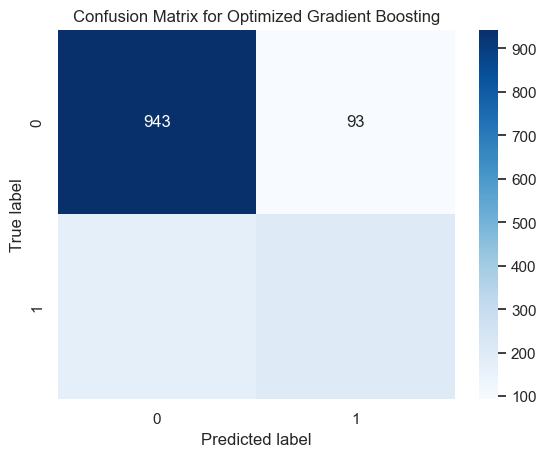

In [165]:
# Train the Gradient Boosting model with the best parameters
best_gb_model = GradientBoostingClassifier(learning_rate=0.05, max_depth=4, n_estimators=100, subsample=0.8)
best_gb_model.fit(X_train, y_train)

# Make predictions
y_pred = best_gb_model.predict(X_test)

# Evaluate the model
print(f"Gradient Boosting Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nGradient Boosting Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Optimized Gradient Boosting")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()


#### Balanced Data using SMOTE

Class distribution after SMOTE:
Churn
0    4138
1    4138
Name: count, dtype: int64
Logistic Regression with SMOTE Accuracy: 0.7544

Logistic Regression with SMOTE Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.73      0.81      1036
           1       0.52      0.83      0.64       373

    accuracy                           0.75      1409
   macro avg       0.72      0.78      0.73      1409
weighted avg       0.82      0.75      0.77      1409



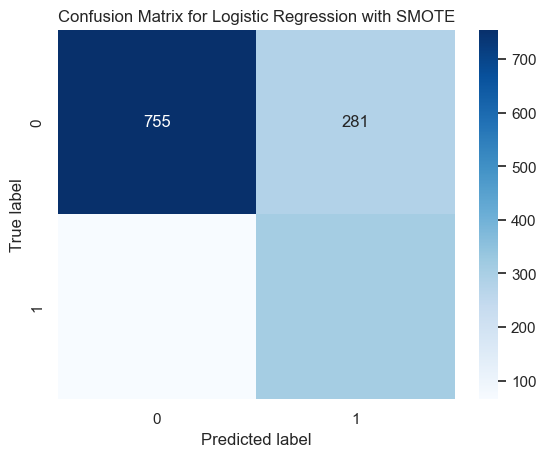

Random Forest with SMOTE Accuracy: 0.7871

Random Forest with SMOTE Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1036
           1       0.60      0.59      0.60       373

    accuracy                           0.79      1409
   macro avg       0.73      0.72      0.73      1409
weighted avg       0.79      0.79      0.79      1409



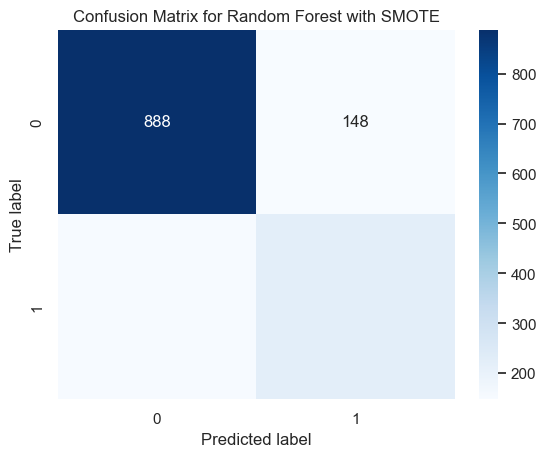

Gradient Boosting with SMOTE Accuracy: 0.7871

Gradient Boosting with SMOTE Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.80      0.85      1036
           1       0.58      0.74      0.65       373

    accuracy                           0.79      1409
   macro avg       0.74      0.77      0.75      1409
weighted avg       0.81      0.79      0.79      1409



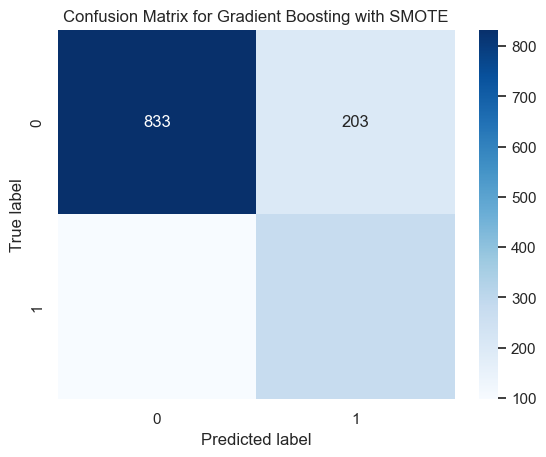

SVM with SMOTE Accuracy: 0.7644

SVM with SMOTE Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1036
           1       0.54      0.76      0.63       373

    accuracy                           0.76      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.76      0.78      1409



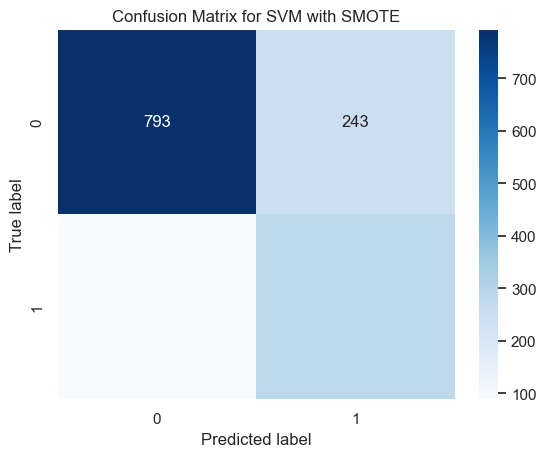

K-Nearest Neighbors with SMOTE Accuracy: 0.6948

K-Nearest Neighbors with SMOTE Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.68      0.77      1036
           1       0.45      0.73      0.56       373

    accuracy                           0.69      1409
   macro avg       0.66      0.70      0.66      1409
weighted avg       0.76      0.69      0.71      1409



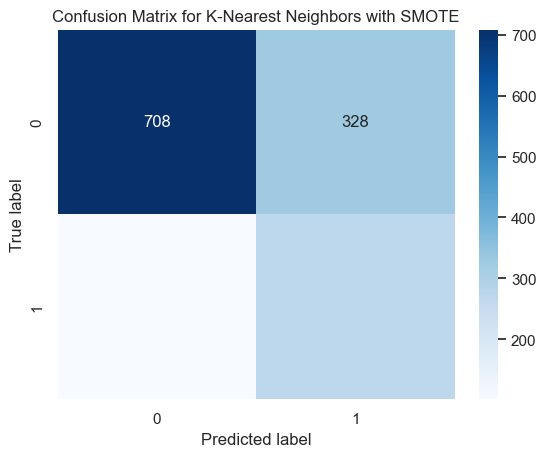

Decision Tree with SMOTE Accuracy: 0.7346

Decision Tree with SMOTE Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.79      0.81      1036
           1       0.50      0.57      0.53       373

    accuracy                           0.73      1409
   macro avg       0.67      0.68      0.67      1409
weighted avg       0.75      0.73      0.74      1409



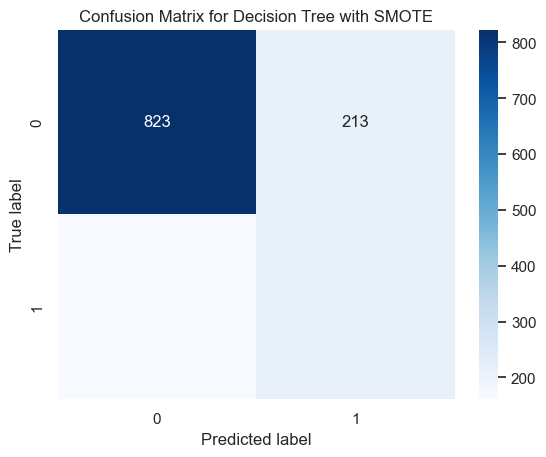


Best Model with SMOTE: Random Forest with Accuracy: 0.7871


In [166]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Step 1: Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the class distribution after SMOTE
print("Class distribution after SMOTE:")
print(y_train_smote.value_counts())

# Step 2: Define a dictionary of models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(learning_rate=0.05, max_depth=4, n_estimators=100, subsample=0.8),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

# Dictionary to store model performance
model_performance = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Fit the model on SMOTE-applied data
    model.fit(X_train_smote, y_train_smote)
    
    # Predict on the test set
    y_pred_smote = model.predict(X_test)
    
    # Evaluate the model's accuracy
    accuracy = accuracy_score(y_test, y_pred_smote)
    model_performance[model_name] = accuracy
    
    # Print the accuracy of each model
    print(f"{model_name} with SMOTE Accuracy: {accuracy:.4f}")
    
    # Print classification report for each model
    print(f"\n{model_name} with SMOTE Classification Report:\n")
    print(classification_report(y_test, y_pred_smote))
    
    # Plot confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred_smote)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix for {model_name} with SMOTE")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()

# Print the best model based on accuracy
best_model = max(model_performance, key=model_performance.get)
print(f"\nBest Model with SMOTE: {best_model} with Accuracy: {model_performance[best_model]:.4f}")


**Observations:**

- Gradient Boosting has the best accuracy at 0.7871 and also performs well in terms of precision, recall, and F1 score across both classes.
- Logistic Regression and SVM have decent performance but slightly lower accuracy.
- Random Forest shows strong performance, especially in handling the "Not Churn" class, though it still struggles with the "Churn" class.
- K-Nearest Neighbors and Decision Tree have lower accuracy and F1 scores compared to the other models.

Given these results, Gradient Boosting continues to show the best balance between precision, recall, and F1 scores.

### Choosing the Best Model

If we only consider accuracy, Gradient Boosting with class weight was among the best.
However, since recall is more important in this context (identifying as many churners as possible), you might want to explore if other models provide better recall for Class 1.

Comparison with Other Models:
Logistic Regression with class weight had a recall of 0.83 for Class 1, significantly higher than Gradient Boosting. This suggests that Logistic Regression would detect more churners, reducing false negatives.
Random Forest with class weight had a recall of 0.47, which is lower than Gradient Boosting, making Gradient Boosting better for recall than Random Forest but still lower than Logistic Regression.
Conclusion:
If recall (minimizing false negatives) is the most important metric for your business case, Logistic Regression with class weight is likely the better model, as it captures a larger percentage of churners (83%) compared to Gradient Boosting (54%).

However, if you're looking for a balance between precision and recall, Gradient Boosting offers better precision and still a reasonable recall. But overall, if catching as many churners as possible is your main priority, Logistic Regression with class weight seems more suited for your needs.

### Hyperparameter Tuning for the Logistic Regression with Class Weight

In [168]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid for Logistic Regression with class weight
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'solver': ['liblinear', 'lbfgs'],      # Solvers
    'class_weight': ['balanced', {0: 0.6, 1: 0.4}, {0: 0.5, 1: 0.5}, {0: 0.7, 1: 0.3}]  # Different class weight strategies
}

# Create the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Setup GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='recall', n_jobs=-1, verbose=2)

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)

# Best parameters and best score (based on recall)
print("Best Logistic Regression Parameters:", grid_search.best_params_)
print("Best Logistic Regression Recall Score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_log_reg = grid_search.best_estimator_
y_pred = best_log_reg.predict(X_test)

# Print classification report for the test set
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Logistic Regression Parameters: {'C': 100, 'class_weight': 'balanced', 'solver': 'liblinear'}
Best Logistic Regression Recall Score: 0.8021404682274247
              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1036
           1       0.52      0.82      0.63       373

    accuracy                           0.75      1409
   macro avg       0.72      0.77      0.72      1409
weighted avg       0.81      0.75      0.76      1409



**Key Insights:**

- Recall for Class 1 (Churn) is high at 0.82, meaning the model is effective at identifying a large portion of churn cases (i.e., it correctly identifies 82% of the churners).
- Precision for Class 1 (Churn) is 0.52, indicating that there are some false positives (customers predicted to churn who actually don't).
- The F1-score, which balances precision and recall, is 0.63 for churn, which is reasonable given the class imbalance.
- The overall accuracy is 0.75, slightly lower due to the emphasis on increasing recall for churners, which is often more important for churn prediction.

**Conclusion:**

- Logistic Regression with class weight balanced and hyperparameter tuning is a strong model, as it provides a good balance between identifying churners (recall) and maintaining decent precision.
- The high recall for churners (0.82) suggests that this model will help the business catch most of the customers likely to churn, which is crucial for preventing revenue loss.

If recall is more important to the business (to minimize churn), this model is a solid choice.

#### Save Model 

In [172]:
# Save the best logistic regression model using pickle
model_filename = 'best_logistic_regression_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(best_log_reg, file)

# Load the saved model (to check if it is saved correctly)
with open(model_filename, 'rb') as file:
    loaded_model = pickle.load(file)